<a href="https://colab.research.google.com/github/vvenkatesh77/Dataset-for-ML-models/blob/main/HierarchialClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clustering Income Spent Using Hierarchial Clustering

#Import basic Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Load dataset from local directory

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving dataset.csv to dataset.csv


#Read Dataset

In [ ]:
dataset=pd.read_csv('dataset.csv')


#Summerize Dataset

In [ ]:
print(dataset.shape)
print(dataset.describe())
print(dataset.head())

(200, 5)
       CustomerID         Age  Annual Income (k$)  Spending Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.264721       25.823522
min      1.000000   18.000000           15.000000        1.000000
25%     50.750000   28.750000           41.500000       34.750000
50%    100.500000   36.000000           61.500000       50.000000
75%    150.250000   49.000000           78.000000       73.000000
max    200.000000   70.000000          137.000000       99.000000
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40


#label Encoding

In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
dataset['Gender']=label_encoder.fit_transform(dataset['Gender'])
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


#Dendrogram Data Visualization

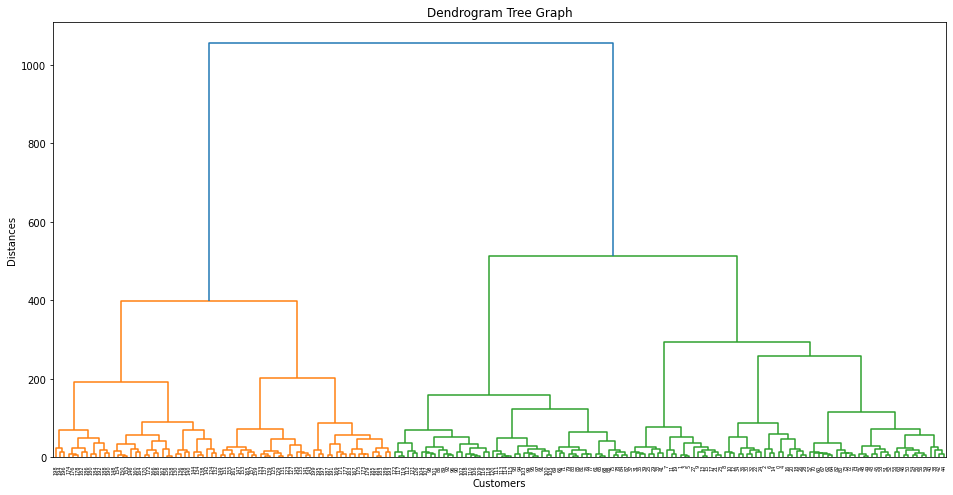

In [ ]:
import scipy.cluster.hierarchy as clus
plt.figure(1,figsize=(16,8))
dendrogram=clus.dendrogram(clus.linkage(dataset, method="ward"))
plt.title("Dendrogram Tree Graph")
plt.xlabel("Customers")
plt.ylabel("Distances")
plt.show()

#Fitting the Hierarchial Clustering to the dataset with n=5

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average')
y_means=model.fit_predict(dataset)
y_means

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

#Visualize teh number of clusters n=5
Cluster 1:customer with medium income and medium spending
Cluster 2:customer with high income and high spending
Cluster 3:customer with low income and low spending
Cluster 4:customer with high income and low spending
Cluster 5:customer with low income and high spending

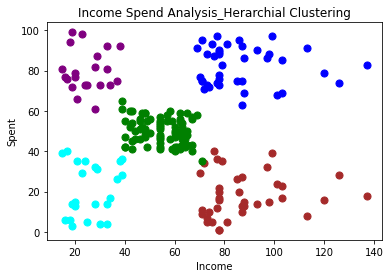

In [9]:
x=dataset.iloc[:,[3,4]].values
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=50, c='brown',label='Cluster1')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(x[y_means==3,0],x[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(x[y_means==4,0],x[y_means==4,1],s=50, c='purple',label='Cluster5')

plt.title("Income Spend Analysis_Herarchial Clustering")
plt.xlabel("Income")
plt.ylabel("Spent")
plt.show()


